# LIBRARY FETCHING

In [1]:
import matplotlib.pyplot as plt                   # LIBRARY FOR GRAPH PLOTING
import numpy as np                                # LIBRARY FOR ARRY COLLECTION
import cv2                                        # LIBRARY FOR IMAGE PROCESSING
from sklearn.cluster import KMeans                # PACKAGE IMPORTING FOR ALGO IMPLEMENTATION  
from collections import Counter

# IMAGE READING

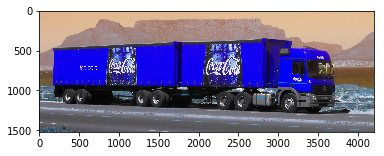

In [2]:
image = cv2.imread('C:\\Users\\jaya\\Desktop\\image\\truck.jpg')    # FILE PATH FOR IMAGE PLOTING
type(image)
image.shape
plt.imshow(image)

# IMAGE MANIPULATION USING OPEN_CV

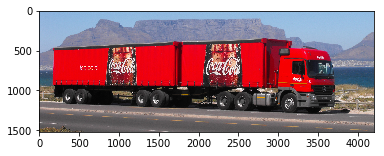

In [3]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)    # COLOR CONVERSING
plt.imshow(image)

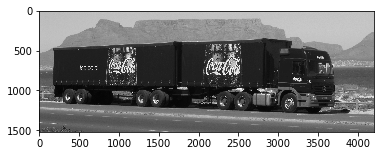

In [4]:
image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

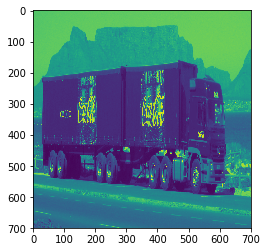

In [5]:
width=700                                   # RESIZE IMAGE 
lenght=700                                  # RESIZE IMAGE
resized=cv2.resize(image,(lenght,width))    # LENGTH
plt.imshow(resized)

2.7659434582511504


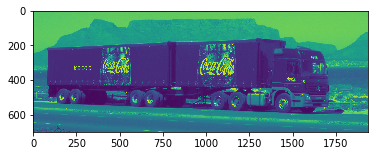

In [6]:
aspect = image.shape[1] / float(image.shape[0])                 # DEVIDE THE IMAGE SHAPE TO THE FLOAT IMAGE SHAPE 
print(aspect)                                                   # CALL PRINT FUNCTION FOR PRINT ASPECT

if(aspect > 1):                                                 # CONDITIONAL STATEMENT
    res = int(aspect * lenght)                                  # LANDSCAPE ORIENTATION - WIDE IMAGE
    scaled = cv2.resize(image, (res, lenght))                   
if(aspect < 1):
                                                                # PORTRAIT ORINTATION -TALL IMAGE 
    res = int(width / aspect)
    scaled = cv2.resize(image, (width, res))
if(aspect == 1):
    scaled = cv2.resize(image, (width, lenght))

                                                                # SHOW IMAGE
plt.imshow(scaled)

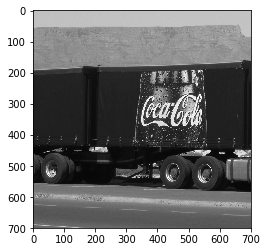

In [7]:
def crop_center(image,cropx,cropy):                         # FUNCTION DEFINED
    y,x,=image.shape                                        
    startx=x//2-(cropx//2)
    starty=y//2-(cropy//2)
    return image[starty:starty+cropy,startx:startx+cropx]   # RETURN FUNCTION

cropped = crop_center(scaled,width,width)                   # IMAGE CROPING
plt.imshow(cropped,cmap='gray')

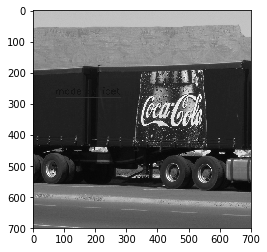

In [8]:
image=cropped.copy()                                                                          # CROPPED IMAGE CALL
cv2.putText(image,'made by icet',(70,270),cv2.FONT_HERSHEY_SIMPLEX,1.0,(20,240,150),2)        # TEXT INSERTION ON IMAGE
cv2.line(image, (75, 280), (280, 280), (50, 100, 250), 3)                                     
plt.imshow(image, cmap='gray')                                                                # IMAGE SHOWING

In [9]:
def rgb2hex(rgb):                                                               # FUNCTION DEFINED FOR HEXADECIMAL FORMAT
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex
print(rgb2hex([255, 0, 0]))

#ff0000


# IMAGE REARRANGING & PIE CHART SHOWING¶

In [10]:
def plot_image_info(path, k=8):                                                              # FUNCTION DEFINED FOR IMAGE INFORM
    im_bgr = cv2.imread(path)                                                                # IMAGE PATH
    im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)                                         # COLOR CONVERSION

    resized_im_rgb = cv2.resize(im_rgb, (64, 64), interpolation=cv2.INTER_AREA)              # IMAGE RESIZING  
    im_list = resized_im_rgb.reshape((resized_im_rgb.shape[0] * resized_im_rgb.shape[1], 3)) # MULTIPLICATION IMAGE 
    clt = KMeans(n_clusters=k)                                                               # ALGO APPLY
    labels = clt.fit_predict(im_list)                                                          
        
    label_counts = Counter(labels)                                                           # LEVEL COUNT
    total_count = sum(label_counts.values())

    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]

    plt.figure(figsize=(14, 8))                                                              # PLOTING IMAGE
    plt.subplot(221)                                                                         
    plt.imshow(im_rgb)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)     # PLOTING IMAGE
    plt.axis('equal')
    plt.show()

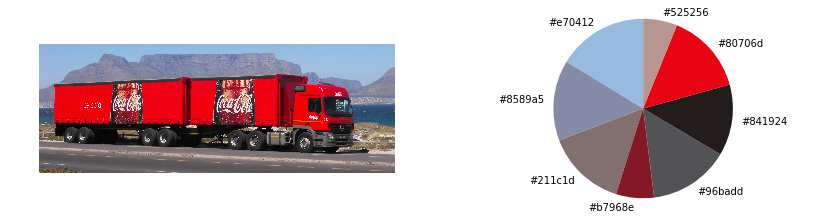

In [11]:
plot_image_info(r'C:\\Users\\jaya\\Desktop\\image\\truck.jpg')